# Tutorial 4

In [93]:
%load_ext autoreload

%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from numba import jit
from tut4 import get_gaussian_eta, get_particles_array, evolve, calculate_r2, get_MSD, get_several

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Ex.1

In [75]:
nu = 0.5E-1
alpha = 1E-1
# v0 = 5
v0_vec = np.array([3])
# v0_vec = np.array([1, 3, 5, 7, 9])
gamma = 1.0
N = 1E+4
dt = 1E-1
t_tot = np.arange(dt, stop=100, step=dt)

We model the system as a matrix of N particles, with 5 variables:
* rx
* ry
* theta
All start in r(t_0) = 0

In [ ]:
def plot_MSD(MSD_tab, v0_vec):
    plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
    for MSD, v0 in zip(MSD_tab, v0_vec):
        plt.loglog(t_tot, MSD, label=f"v = {v0}")
    plt.legend()
    plt.xlabel(r'$\tau$(s)')
    plt.ylabel(r'MSD')

In [92]:
M = get_particles_array(N)
v0 = 5
M_new = evolve(M, dt, gamma, v0, alpha, nu)
M_new

array([[ 0.42911436, -0.07088564,  0.05589007],
       [ 0.46335474, -0.03664526,  0.1002096 ],
       [ 0.5402033 ,  0.0402033 , -0.05609966],
       ...,
       [ 0.68856875,  0.18856875,  0.033706  ],
       [ 0.51414645,  0.01414645, -0.07575356],
       [ 0.60020252,  0.10020252, -0.04617202]])

In [86]:
MSD_tab = get_several(v0_vec)

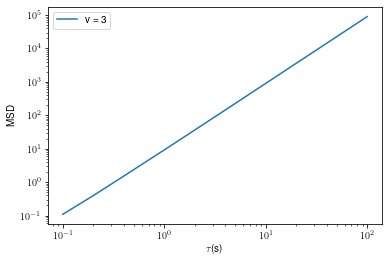

In [87]:
plot_MSD(MSD_tab, v0_vec)

In [ ]:
# M = get_particles_array(N)
# v0 =5

In [ ]:
# new_M = evolve(M, dt,gamma, v0, alpha, nu)

In [ ]:

# M = np.array([x, y, theta]).T

In [ ]:
# MSD = np.zeros(t_tot.size)
# N = int(N)
# x = np.zeros(N)
# y = np.zeros(N)
# theta = np.zeros(N)
# r2 = np.zeros(N)
# for it, dt in enumerate(t_tot):
#     for i in range(N-1):
#         eta = get_gaussian_eta()
#         x[i+1] = x[i] + dt/gamma*v0*np.cos(theta[i]) + np.sqrt(dt*alpha)*eta[0]
#         y[i+1] = y[i] + dt/gamma*v0*np.sin(theta[i]) + np.sqrt(dt*alpha)*eta[1]
#         r2[i+1] = np.power(x[i], 2) + np.power(y[i], 2)
#         theta[i+1] = theta[i] + np.sqrt(dt*nu)*eta[2]
#     MSD[it] = np.sum(r2)/N